In [1]:
import numpy as np 
import h5py
import matplotlib.pyplot as plt 
import matplotlib
%matplotlib inline

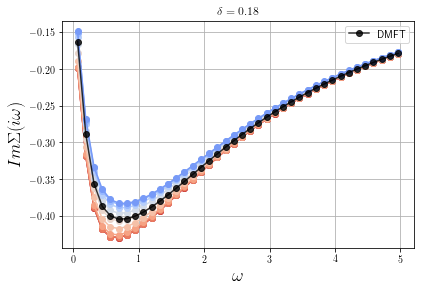

In [2]:
import matplotlib.cm as cm
filename= "../data/self_dmf2rg-data.h5"
senergy = np.array(h5py.File(filename,"r")["/DMF2RG/SelfEnergy/Im"])
k_grid_x, k_grid_y = np.array(h5py.File(filename,"r")["DMF2RG/SelfEnergy/k_grid_x"]),np.array(h5py.File(filename,"r")["/DMF2RG/SelfEnergy/k_grid_y"])
beta = h5py.File(filename,"r")["Parameters/beta"][0]
U = h5py.File(filename,"r")["Parameters/U"][0]
tpri = h5py.File(filename,"r")["Parameters/tp"][0]
dens = h5py.File(filename,"r")["Parameters/dmft_filling"][0]
dmft_file = "../data/self_dmft-data.h5"
dmft_senergy = np.array(h5py.File(dmft_file,"r")["SelfEnergy/Im"])[:40]
k_grid = np.dstack((k_grid_x,k_grid_y))[0]
ax = plt.subplot()
ax.scatter(k_grid[:,0],k_grid[:,1])

for i in range(len(k_grid)):
    ax.annotate('%s'%i, xy=(k_grid[i,0],k_grid[i,1]),textcoords='data')
omarray = np.array([np.pi/beta*(2.*i+1.) for i in range(senergy.shape[1])])
plt.clf()
ax = plt.subplot() 
col = np.array([cm.coolwarm(1.-(i-33.)/(43.-33.)*0.9) for i in range(33,43)]) 

for i in range(33,43):
    ax.plot(omarray,senergy[i,:],"-o",color = col[i-33])
ax.plot(omarray,dmft_senergy,"-o",color="black",alpha=0.8,label=r"DMFT")
ax.set_xlabel(r"$\omega$",fontsize=18 )
ax.set_ylabel(r"$Im\Sigma(i\omega)$",fontsize=18)
ax.legend()
ax.grid()
plt.tight_layout() 
plt.title(r"$\delta=0.18$")
plt.savefig("../plots/dmf2rg_k_senergy.png",dpi=300)

#ax.plot(omarray,senergy[33,:],"-o")

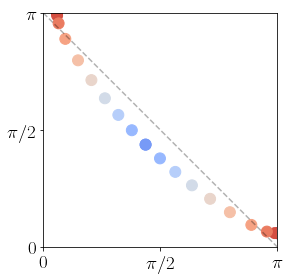

In [3]:
ax = plt.subplot()
ax.scatter(k_grid[33:43,0],k_grid[33:43,1],color=col,s=120)
ax.scatter(k_grid[33:43,1],k_grid[33:43,0],color=col,s=120)

ax.set_xlim([0,np.pi])
ax.set_ylim([0,np.pi])
points = np.arange(0,np.pi,0.01)
magline=np.pi-points
ax.plot(points,magline,'--',color='black',alpha=0.3)
ax.set_aspect('equal')
ax.set_xticks([0,np.pi/2,np.pi])
ax.set_xticklabels([r"$0$",r"$\pi/2$",r"$\pi$"],fontsize=19)
ax.set_xticks([0,np.pi/2,np.pi])
ax.set_xticklabels([r"$0$",r"$\pi/2$",r"$\pi$"],fontsize=19)
ax.set_yticks([0,np.pi/2,np.pi])
ax.set_yticklabels([r"$0$",r"$\pi/2$",r"$\pi$"],fontsize=19)
plt.tight_layout()
plt.savefig("../plots/color_fs.png",dpi=300)

#plt.xticks([0,np.pi])
#plt.xtick_labe
#plt.yticks([])